# LAB4: Root Finding

## Bisection Method

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.optimize import fsolve



def f(x):
    return x**5 - x**4 - x**2 - 1

def df(x):
    return 5*x**4 - 4*x**3 - 2*x


epsilon1 = 0.001
epsilon2 = 0.000001
epsilon3 = 0.000000001

left_limit = 0
right_limit = 10

In [3]:
def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)


In [4]:
x01 = my_bisection(f, left_limit, right_limit, epsilon1)
x02 = my_bisection(f, left_limit, right_limit, epsilon2)
x03 = my_bisection(f, left_limit, right_limit, epsilon3)
print(f'Solution with tolerance={epsilon1}: x={x01}\n')
print(f'Solution with tolerance={epsilon2}: x={x02}\n')
print(f'Solution with tolerance={epsilon3}: x={x03}\n')
y = lambda x: x**5 - 7*x**3 - 3*x - 2
true_root = fsolve(f, 3)
print(f'Solution with python fsolve:   x={true_root[0]}\n')


Solution with tolerance=0.001: x=1.57012939453125

Solution with tolerance=1e-06: x=1.5701472759246826

Solution with tolerance=1e-09: x=1.5701473121589515

Solution with python fsolve:   x=1.5701473121960867



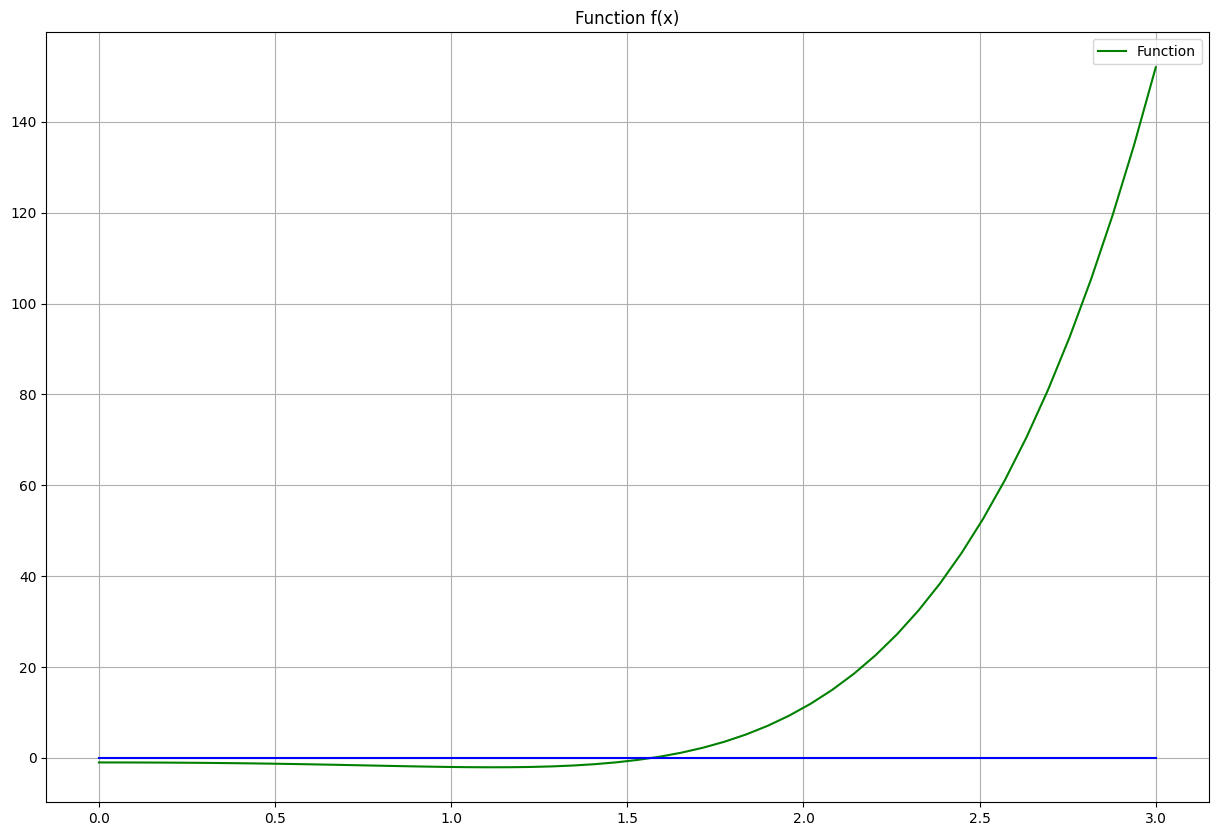

In [5]:
x = np.linspace(0,3,50)
y = f(x)
y0 = np.zeros(50)
plt.figure(figsize=(15, 10))
plt.title("Function f(x)")
plt.grid(True)
plt.plot(x, y, color="green", label="Function")
plt.plot(x, y0, color="blue")
plt.legend()
plt.show()


## Newton-Raphson Method

In [6]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

x01 = my_newton(f, df, (right_limit + left_limit)/2, epsilon1)
x02 = my_newton(f, df, (right_limit + left_limit)/2, epsilon2)
x03 = my_newton(f, df, (right_limit + left_limit)/2, epsilon3)
print(f'Solution with tolerance={epsilon1}: x={x01}\n')
print(f'Solution with tolerance={epsilon2}: x={x02}\n')
print(f'Solution with tolerance={epsilon3}: x={x03}\n')
print(f'Solution with python fsolve:   x={true_root[0]}\n')

Solution with tolerance=0.001: x=1.5701505327145264

Solution with tolerance=1e-06: x=1.5701473122162564

Solution with tolerance=1e-09: x=1.5701473122162564

Solution with python fsolve:   x=1.5701473121960867

